In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the file from its local path into a dataframe
path_1 = '/content/drive/MyDrive/datasetNLP.csv'
df = pd.read_csv(path_1)
df.head(5)

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
data = df.sample(n=1000, axis=0) #to select only a million rows to use in our dataset

data = data['ABSTRACT']  #to extract the headline_text column and give it the variable name data

In [ ]:
# lemmatization and removing stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#downloading dependencies
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

#function to lemmatize and remove stopwords from the text data
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words


#applying the function to the dataset
data = data.apply(preprocess)
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


466     [image, understanding, using, deep, convolutio...
3361    [new, approach, efficiently, exploring, config...
1881    [recent, experimental, result, shown, active, ...
8803    [multi-task, learning, (, mtl, ), recently, co...
3468    [series, elastic, actuator, (, sea, ), playing...
                              ...                        
2588    [problem, prescribing, gaussian, curvature, ri...
3604    [note, summarizes, result, obtained, author, h...
735     [stochastic, network, calculus, tool, computin...
4565    [paper, ,, revisit, kalman, filter, theory, .,...
7520    [editorial, special, issue, ``, zeitschrift, f...
Name: ABSTRACT, Length: 1000, dtype: object

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

# Create a dictionary from the preprocessed data
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['model', 'learning', 'system', 'network', 'algorithm', 'problem', 'method', 'approach', 'process', 'show']
Topic: 1
Words: ['method', 'problem', 'algorithm', 'using', 'result', 'system', 'data', 'model', 'study', 'used']
Topic: 2
Words: ['data', 'network', 'model', 'task', 'approach', 'learning', 'paper', 'feature', 'using', 'result']
Topic: 3
Words: ['phase', 'model', 'equation', 'flow', 'distribution', 'result', 'energy', 'show', 'system', 'solution']
Topic: 4
Words: ['$', '}', '{', 'n', 'x', 'k', 'space', 'show', 'result', 'also']


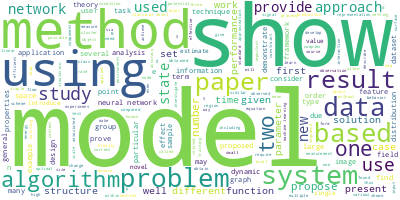

In [ ]:
from wordcloud import WordCloud

#Join the different processed titles together.
long_string = ','.join(list(df['ABSTRACT'].values))
#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
#Generate a word cloud
wordcloud.generate(long_string)
#Visualize the word cloud
wordcloud.to_image()

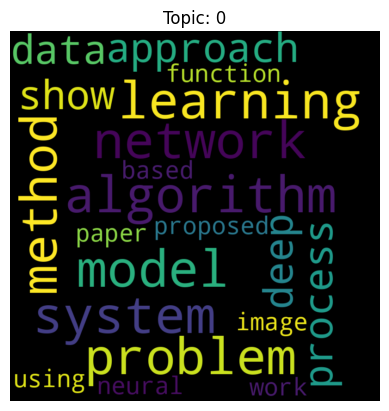

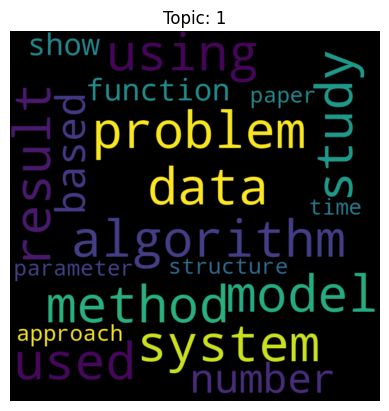

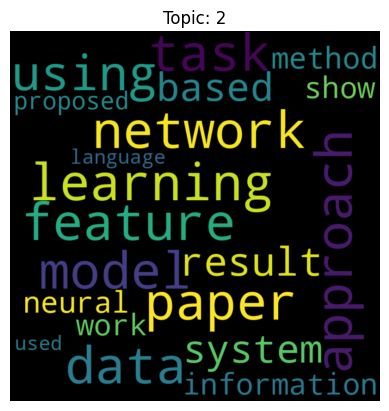

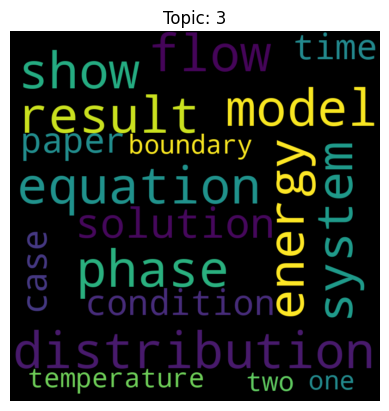

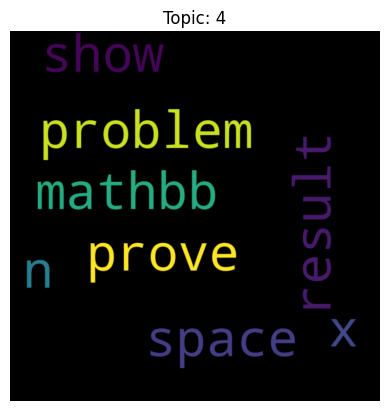

In [ ]:
# Plotting wordcloud of topic for each of the abstract

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [ ]:
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords

#removing stop words for converting dataframe into a corpus and dictionary
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = df.ABSTRACT.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['present', 'novel', 'understandings', 'gamma', 'poisson', 'gap', 'model', 'probabilistic', 'matrix', 'factorization', 'model', 'count', 'data', 'show', 'gap', 'rewritten', 'free', 'score', 'activation', 'matrix', 'gives', 'us', 'new', 'insights', 'estimation', 'topic', 'dictionary', 'matrix', 'maximum', 'marginal']


In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)

#make the corpus
texts = data_words

#Term of the document frequency
corpus = [id2word.doc2bow(text) for text in texts]

#view document corpus
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1)]


LDA Model Training

In [ ]:
#making a model with 10 topics where the topic is the combination of keywords
#set number of topics
num_topics = 10

#LDA Model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

#print the keyword
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.008*"data" + 0.007*"model" + 0.006*"learning" + 0.006*"models" + 0.004*"two" + 0.004*"show" + 0.004*"based" + 0.003*"new" + 0.003*"system" + 0.003*"order"'), (1, '0.007*"data" + 0.007*"model" + 0.006*"using" + 0.005*"method" + 0.005*"paper" + 0.005*"show" + 0.004*"based" + 0.004*"models" + 0.004*"quantum" + 0.004*"problem"'), (2, '0.007*"problem" + 0.006*"show" + 0.006*"based" + 0.006*"model" + 0.006*"function" + 0.006*"network" + 0.005*"data" + 0.005*"two" + 0.004*"method" + 0.004*"using"'), (3, '0.005*"data" + 0.005*"paper" + 0.005*"two" + 0.005*"algorithm" + 0.004*"also" + 0.004*"analysis" + 0.004*"model" + 0.003*"using" + 0.003*"show" + 0.003*"systems"'), (4, '0.005*"model" + 0.005*"show" + 0.005*"spin" + 0.005*"magnetic" + 0.005*"results" + 0.004*"also" + 0.004*"two" + 0.004*"linear" + 0.004*"based" + 0.003*"properties"'), (5, '0.007*"model" + 0.007*"data" + 0.006*"learning" + 0.005*"time" + 0.004*"based" + 0.004*"approach" + 0.004*"system" + 0.004*"results" + 0.004*"model

Analyzing LDA Result

In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97721 sha256=d3257673e47c2d10e21b80d1c2bd1e834b80a721e833308a9c2b5837c6f249d9
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim.prepare(lda_model,corpus=corpus,dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.044479  0.018385       1        1  20.047725
2      0.027654 -0.031399       2        1  17.580276
8      0.029356  0.011483       3        1  12.965558
9     -0.067766 -0.037437       4        1  12.768487
6      0.015165  0.009881       5        1   8.484225
7      0.015832 -0.044609       6        1   8.450762
4     -0.083962  0.042112       7        1   7.175606
1      0.002435 -0.011505       8        1   5.007638
0      0.026830  0.046905       9        1   4.614473
3     -0.010022 -0.003816      10        1   2.905251, topic_info=          Term         Freq        Total Category  logprob  loglift
7         data  4524.000000  4524.000000  Default  30.0000  30.0000
453   learning  2867.000000  2867.000000  Default  29.0000  29.0000
296      paper  2912.000000  2912.000000  Default  28.0000  28.0000
1740    mathbb   882.000000   882.000000  Default  27.0000  27.0000
240     models  2349.000000  2349.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
162   proposed    51.558370  1989.683069  Topic10  -6.1437  -0.1144
832      state    49.812766  1860.887817  Topic10  -6.1782  -0.0819
53        work    45.937275  1505.513968  Topic10  -6.2592   0.0490
697       case    45.514794  1263.209574  Topic10  -6.2684   0.2153
517     number    45.788003  1947.114909  Topic10  -6.2624  -0.2114

[900 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
10580      4  0.137621            a_i
10580      5  0.825729            a_i
1723       1  0.073111        abelian
1723       2  0.009139        abelian
1723       3  0.054833        abelian
...      ...       ...            ...
14444      7  0.782694             y_
13712      1  0.070671         yamabe
13712      7  0.848050         yamabe
18677      8  0.740070  zamolodchikov
17966      6  0.807787          zheng

[3180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 9, 10, 7, 8, 5, 2, 1, 4])